# Capstone Project
### Jupyter Notebook (4/4)

### Bruno Athayde e Silva - 448898

#### XGBoost Final Model and Visualization

---

### Table of Contents

### [Introduction](#introduction)

### [Methodology](#methodology)

   - [Final Model](#final)
   
   - [Machine Learning Model Visualization](#model_viz)
   
### [Conclusion](#conclusion)

### [Reference](#reference)

---

### Introduction
<a id = 'introduction'></a>

In the previous steps until getting to this Notebook, I was able to fine-tune the hyperparameters of the **XGBoost** model until finally getting a score of 60%, which means that 60% of my target variable, ***FarePerMile***, can be explained by the features of the model.

In this Notebook, the goal is to re-run the XGBoost model utilizing the hyperparameters defined before and work on some visuals to help me explain the model's results.

I will start importing some essential libraries and loading the cleaned data from the EDA Jupyter Notebook. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the display to show every column and row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# load the data
X = pd.read_csv('/Volumes/GoogleDrive/My Drive/BrainStation/CAPSTONE/OTHER/DATABASE/FINAL/tkt_final_X.csv')
X = X.drop(columns = 'Unnamed: 0')

y = pd.read_csv('/Volumes/GoogleDrive/My Drive/BrainStation/CAPSTONE/OTHER/DATABASE/FINAL/tkt_final_Y.csv')
y = y.drop(columns = 'Unnamed: 0')

In [4]:
# check the dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731515 entries, 0 to 731514
Columns: 585 entries, _Year to TPA-PHL
dtypes: float64(3), int64(582)
memory usage: 3.2 GB


In [5]:
# check the dataframe
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731515 entries, 0 to 731514
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FarePerMile  731515 non-null  float64
dtypes: float64(1)
memory usage: 5.6 MB


In [6]:
X.head()

,_Year,_Quarter,RoundTrip,Passengers,MilesFlown,FareClass_0,FareClass_1,FareClass_2,RPCarrier_9E,RPCarrier_AA,RPCarrier_AS,RPCarrier_B6,RPCarrier_CP,RPCarrier_DL,RPCarrier_EV,RPCarrier_F9,RPCarrier_G4,RPCarrier_G7,RPCarrier_HA,RPCarrier_MQ,RPCarrier_NK,RPCarrier_OH,RPCarrier_OO,RPCarrier_QX,RPCarrier_SY,RPCarrier_UA,RPCarrier_VX,RPCarrier_WN,RPCarrier_YV,RPCarrier_YX,ATL-BOS,ATL-BWI,ATL-DCA,ATL-DEN,ATL-DFW,ATL-DTW,ATL-EWR,ATL-FLL,ATL-HOU,ATL-IAH,ATL-LAS,ATL-LAX,ATL-LGA,ATL-MCO,ATL-MDW,ATL-MIA,ATL-MSP,ATL-MSY,ATL-ORD,ATL-PHL,ATL-PHX,ATL-SEA,ATL-SFO,ATL-TPA,AUS-ATL,AUS-BOS,AUS-DEN,AUS-EWR,AUS-JFK,AUS-LAS,AUS-LAX,AUS-MCO,AUS-ORD,AUS-SEA,AUS-SFO,BDL-FLL,BDL-MCO,BDL-TPA,BNA-BOS,BNA-LAX,BNA-LGA,BOI-SEA,BOS-ATL,BOS-AUS,BOS-BNA,BOS-CLT,BOS-DCA,BOS-DEN,BOS-DFW,BOS-DTW,BOS-EWR,BOS-FLL,BOS-LAS,BOS-LAX,BOS-LGA,BOS-MCO,BOS-MIA,BOS-MSP,BOS-MSY,BOS-ORD,BOS-PBI,BOS-PHL,BOS-PHX,BOS-RDU,BOS-RSW,BOS-SAN,BOS-SEA,BOS-SFO,BOS-SLC,BOS-TPA,BUF-MCO,BWI-ATL,BWI-DEN,BWI-FLL,BWI-LAS,BWI-LAX,BWI-MCO,BWI-ORD,BWI-SAN,BWI-SFO,CLE-ATL,CLE-BOS,CLE-FLL,CLE-LAS,CLE-LAX,CLE-LGA,CLE-MCO,CLE-ORD,CLT-BOS,CLT-EWR,CLT-LGA,CLT-ORD,CMH-LAX,CMH-LGA,CMH-MCO,CVG-DEN,CVG-LAS,CVG-LGA,DAL-LAX,DCA-ATL,DCA-BOS,DCA-FLL,DCA-LAX,DCA-MCO,DCA-MIA,DCA-ORD,DCA-SFO,DEN-ATL,DEN-AUS,DEN-BNA,DEN-BOS,DEN-BWI,DEN-DCA,DEN-DFW,DEN-DTW,DEN-EWR,DEN-FLL,DEN-IAD,DEN-IAH,DEN-LAS,DEN-LAX,DEN-LGA,DEN-MCI,DEN-MCO,DEN-MSP,DEN-MSY,DEN-ORD,DEN-PDX,DEN-PHL,DEN-PHX,DEN-SAN,DEN-SEA,DEN-SFO,DEN-SJC,DEN-SLC,DEN-SNA,DEN-TPA,DFW-ATL,DFW-BOS,DFW-CLT,DFW-DCA,DFW-DEN,DFW-DTW,DFW-EWR,DFW-LAS,DFW-LAX,DFW-LGA,DFW-MCO,DFW-MSP,DFW-ORD,DFW-PHL,DFW-PHX,DFW-SEA,DFW-SFO,DTW-ATL,DTW-BOS,DTW-DEN,DTW-DFW,DTW-EWR,DTW-FLL,DTW-IAH,DTW-LAS,DTW-LAX,DTW-LGA,DTW-MCO,DTW-MIA,DTW-ORD,DTW-PHL,DTW-PHX,DTW-RSW,DTW-SFO,DTW-TPA,EWR-ATL,EWR-AUS,EWR-BNA,EWR-BOS,EWR-CLT,EWR-DEN,EWR-DFW,EWR-DTW,EWR-FLL,EWR-IAH,EWR-LAS,EWR-LAX,EWR-MCO,EWR-MIA,EWR-MSP,EWR-MSY,EWR-ORD,EWR-PBI,EWR-PHX,EWR-RDU,EWR-RSW,EWR-SAN,EWR-SEA,EWR-SFO,EWR-TPA,FLL-ATL,FLL-BOS,FLL-DEN,FLL-EWR,FLL-LAS,FLL-LAX,FLL-LGA,FLL-ORD,FLL-PHL,GEG-SEA,HNL-LAS,HNL-LAX,IAD-ATL,IAD-DEN,IAD-LAS,IAD-LAX,IAD-MCO,IAD-SEA,IAD-SFO,IAH-ATL,IAH-BOS,IAH-DCA,IAH-DEN,IAH-DTW,IAH-EWR,IAH-LAS,IAH-LAX,IAH-LGA,IAH-MCO,IAH-MIA,IAH-MSP,IAH-ORD,IAH-PHL,IAH-SEA,IAH-SFO,IND-LAS,IND-LAX,IND-MCO,JFK-ATL,JFK-AUS,JFK-BOS,JFK-CLT,JFK-DEN,JFK-FLL,JFK-LAS,JFK-LAX,JFK-MCO,JFK-MIA,JFK-MSY,JFK-ORD,JFK-PBI,JFK-PDX,JFK-PHX,JFK-SAN,JFK-SEA,JFK-SFO,JFK-SJU,JFK-SLC,JFK-TPA,LAS-DEN,LAS-EWR,LAS-JFK,LAS-LAX,LAS-MCO,LAS-ORD,LAS-SEA,LAS-SFO,LAX-ATL,LAX-AUS,LAX-BNA,LAX-BOS,LAX-BWI,LAX-CLE,LAX-DCA,LAX-DEN,LAX-DFW,LAX-DTW,LAX-EWR,LAX-FLL,LAX-HNL,LAX-IAD,LAX-IAH,LAX-JFK,LAX-KOA,LAX-LAS,LAX-LIH,LAX-MCI,LAX-MCO,LAX-MIA,LAX-MSP,LAX-MSY,LAX-OGG,LAX-ORD,LAX-PDX,LAX-PHL,LAX-PHX,LAX-RDU,LAX-SEA,LAX-SFO,LAX-SJC,LAX-SLC,LAX-SMF,LAX-TPA,LGA-ATL,LGA-BNA,LGA-BOS,LGA-CLE,LGA-CLT,LGA-CMH,LGA-DCA,LGA-DEN,LGA-DFW,LGA-DTW,LGA-FLL,LGA-IAH,LGA-MCO,LGA-MIA,LGA-MSP,LGA-MSY,LGA-ORD,LGA-PBI,LGA-PIT,LGA-RDU,LGA-STL,LGA-TPA,MCI-DEN,MCI-LAX,MCI-LGA,MCI-MCO,MCO-ATL,MCO-BOS,MCO-DCA,MCO-DEN,MCO-DTW,MCO-EWR,MCO-JFK,MCO-LAS,MCO-LAX,MCO-LGA,MCO-ORD,MCO-PHL,MCO-SEA,MCO-SFO,MCO-SJU,MIA-ATL,MIA-EWR,MIA-JFK,MIA-LAX,MIA-LGA,MIA-ORD,MIA-SFO,MSP-ATL,MSP-BNA,MSP-BOS,MSP-DCA,MSP-DEN,MSP-DFW,MSP-EWR,MSP-IAH,MSP-LAS,MSP-LAX,MSP-LGA,MSP-MCO,MSP-MIA,MSP-ORD,MSP-PHL,MSP-PHX,MSP-RSW,MSP-SAN,MSP-SEA,MSP-SFO,MSP-TPA,MSY-LAX,OAK-LAS,OAK-SEA,ORD-ATL,ORD-AUS,ORD-BNA,ORD-BOS,ORD-BWI,ORD-CLE,ORD-CLT,ORD-DCA,ORD-DEN,ORD-DFW,ORD-DTW,ORD-EWR,ORD-FLL,ORD-IAH,ORD-LAS,ORD-LAX,ORD-LGA,ORD-MCI,ORD-MCO,ORD-MIA,ORD-MSP,ORD-MSY,ORD-PDX,ORD-PHL,ORD-PHX,ORD-RDU,ORD-RSW,ORD-SAN,ORD-SEA,ORD-SFO,ORD-SLC,ORD-SNA,ORD-TPA,PDX-DEN,PDX-HNL,PDX-JFK,PDX-LAS,PDX-LAX,PDX-ORD,PDX-PHX,PDX-SAN,PDX-SEA,PDX-SFO,PDX-SJC,PHL-ATL,PHL-BNA,PHL-BOS,PHL-DEN,PHL-DFW,PHL-DTW,PHL-FLL,PHL-IAH,PHL-LAS,PHL-LAX,PHL-MCO,PHL-MIA,PHL-MSP,PHL-MSY,PHL-ORD,PHL-SFO,PHL-TPA,PHX-ATL,PHX-BOS,PHX-DEN,PHX-DFW,PHX-DTW,PHX-EWR,PHX-JFK,PHX-LAX,PHX-MCO,PHX-MSP,PHX-ORD,PHX-PDX,PHX-SEA,PHX-SFO,PHX-SLC,PIT-LAS,PIT-LGA,PIT-MCO,PIT-ORD,PVD-MCO,RDU-BO

In [7]:
X = X.rename(columns = {
    'FareClass_0': 'Economy_Class',
    'FareClass_1': 'First_Class',
    'FareClass_2': 'Business_Class',
    'RPCarrier_9E': 'Endeavor_Air',
    'RPCarrier_AA': 'American_Airlines',
    'RPCarrier_AS': 'Alaska_Airlines',
    'RPCarrier_B6': 'JetBlue',
    'RPCarrier_CP': 'Alis_Cargo',
    'RPCarrier_DL': 'Delta',
    'RPCarrier_EV': 'ExpressJet',
    'RPCarrier_F9': 'Frontier',
    'RPCarrier_G4': 'Allegiant',
    'RPCarrier_G7': 'GoJet',
    'RPCarrier_HA': 'Hawaiian',
    'RPCarrier_MQ': 'Envoy_Air',
    'RPCarrier_NK': 'Spirit_Air',
    'RPCarrier_OH': 'PSA',
    'RPCarrier_OO': 'SkyWest',
    'RPCarrier_QX': 'Horizon',
    'RPCarrier_SY': 'Sun_Country',
    'RPCarrier_UA': 'United_Airlines',
    'RPCarrier_VX': 'Virgin_America',
    'RPCarrier_WN': 'SouthWest',
    'RPCarrier_YV': 'Mesa_Airlines',
    'RPCarrier_YX': 'Republic',
    'MilesFlown': 'Distance'
})

In [8]:
X.head()

,_Year,_Quarter,RoundTrip,Passengers,Distance,Economy_Class,First_Class,Business_Class,Endeavor_Air,American_Airlines,Alaska_Airlines,JetBlue,Alis_Cargo,Delta,ExpressJet,Frontier,Allegiant,GoJet,Hawaiian,Envoy_Air,Spirit_Air,PSA,SkyWest,Horizon,Sun_Country,United_Airlines,Virgin_America,SouthWest,Mesa_Airlines,Republic,ATL-BOS,ATL-BWI,ATL-DCA,ATL-DEN,ATL-DFW,ATL-DTW,ATL-EWR,ATL-FLL,ATL-HOU,ATL-IAH,ATL-LAS,ATL-LAX,ATL-LGA,ATL-MCO,ATL-MDW,ATL-MIA,ATL-MSP,ATL-MSY,ATL-ORD,ATL-PHL,ATL-PHX,ATL-SEA,ATL-SFO,ATL-TPA,AUS-ATL,AUS-BOS,AUS-DEN,AUS-EWR,AUS-JFK,AUS-LAS,AUS-LAX,AUS-MCO,AUS-ORD,AUS-SEA,AUS-SFO,BDL-FLL,BDL-MCO,BDL-TPA,BNA-BOS,BNA-LAX,BNA-LGA,BOI-SEA,BOS-ATL,BOS-AUS,BOS-BNA,BOS-CLT,BOS-DCA,BOS-DEN,BOS-DFW,BOS-DTW,BOS-EWR,BOS-FLL,BOS-LAS,BOS-LAX,BOS-LGA,BOS-MCO,BOS-MIA,BOS-MSP,BOS-MSY,BOS-ORD,BOS-PBI,BOS-PHL,BOS-PHX,BOS-RDU,BOS-RSW,BOS-SAN,BOS-SEA,BOS-SFO,BOS-SLC,BOS-TPA,BUF-MCO,BWI-ATL,BWI-DEN,BWI-FLL,BWI-LAS,BWI-LAX,BWI-MCO,BWI-ORD,BWI-SAN,BWI-SFO,CLE-ATL,CLE-BOS,CLE-FLL,CLE-LAS,CLE-LAX,CLE-LGA,CLE-MCO,CLE-ORD,CLT-BOS,CLT-EWR,CLT-LGA,CLT-ORD,CMH-LAX,CMH-LGA,CMH-MCO,CVG-DEN,CVG-LAS,CVG-LGA,DAL-LAX,DCA-ATL,DCA-BOS,DCA-FLL,DCA-LAX,DCA-MCO,DCA-MIA,DCA-ORD,DCA-SFO,DEN-ATL,DEN-AUS,DEN-BNA,DEN-BOS,DEN-BWI,DEN-DCA,DEN-DFW,DEN-DTW,DEN-EWR,DEN-FLL,DEN-IAD,DEN-IAH,DEN-LAS,DEN-LAX,DEN-LGA,DEN-MCI,DEN-MCO,DEN-MSP,DEN-MSY,DEN-ORD,DEN-PDX,DEN-PHL,DEN-PHX,DEN-SAN,DEN-SEA,DEN-SFO,DEN-SJC,DEN-SLC,DEN-SNA,DEN-TPA,DFW-ATL,DFW-BOS,DFW-CLT,DFW-DCA,DFW-DEN,DFW-DTW,DFW-EWR,DFW-LAS,DFW-LAX,DFW-LGA,DFW-MCO,DFW-MSP,DFW-ORD,DFW-PHL,DFW-PHX,DFW-SEA,DFW-SFO,DTW-ATL,DTW-BOS,DTW-DEN,DTW-DFW,DTW-EWR,DTW-FLL,DTW-IAH,DTW-LAS,DTW-LAX,DTW-LGA,DTW-MCO,DTW-MIA,DTW-ORD,DTW-PHL,DTW-PHX,DTW-RSW,DTW-SFO,DTW-TPA,EWR-ATL,EWR-AUS,EWR-BNA,EWR-BOS,EWR-CLT,EWR-DEN,EWR-DFW,EWR-DTW,EWR-FLL,EWR-IAH,EWR-LAS,EWR-LAX,EWR-MCO,EWR-MIA,EWR-MSP,EWR-MSY,EWR-ORD,EWR-PBI,EWR-PHX,EWR-RDU,EWR-RSW,EWR-SAN,EWR-SEA,EWR-SFO,EWR-TPA,FLL-ATL,FLL-BOS,FLL-DEN,FLL-EWR,FLL-LAS,FLL-LAX,FLL-LGA,FLL-ORD,FLL-PHL,GEG-SEA,HNL-LAS,HNL-LAX,IAD-ATL,IAD-DEN,IAD-LAS,IAD-LAX,IAD-MCO,IAD-SEA,IAD-SFO,IAH-ATL,IAH-BOS,IAH-DCA,IAH-DEN,IAH-DTW,IAH-EWR,IAH-LAS,IAH-LAX,IAH-LGA,IAH-MCO,IAH-MIA,IAH-MSP,IAH-ORD,IAH-PHL,IAH-SEA,IAH-SFO,IND-LAS,IND-LAX,IND-MCO,JFK-ATL,JFK-AUS,JFK-BOS,JFK-CLT,JFK-DEN,JFK-FLL,JFK-LAS,JFK-LAX,JFK-MCO,JFK-MIA,JFK-MSY,JFK-ORD,JFK-PBI,JFK-PDX,JFK-PHX,JFK-SAN,JFK-SEA,JFK-SFO,JFK-SJU,JFK-SLC,JFK-TPA,LAS-DEN,LAS-EWR,LAS-JFK,LAS-LAX,LAS-MCO,LAS-ORD,LAS-SEA,LAS-SFO,LAX-ATL,LAX-AUS,LAX-BNA,LAX-BOS,LAX-BWI,LAX-CLE,LAX-DCA,LAX-DEN,LAX-DFW,LAX-DTW,LAX-EWR,LAX-FLL,LAX-HNL,LAX-IAD,LAX-IAH,LAX-JFK,LAX-KOA,LAX-LAS,LAX-LIH,LAX-MCI,LAX-MCO,LAX-MIA,LAX-MSP,LAX-MSY,LAX-OGG,LAX-ORD,LAX-PDX,LAX-PHL,LAX-PHX,LAX-RDU,LAX-SEA,LAX-SFO,LAX-SJC,LAX-SLC,LAX-SMF,LAX-TPA,LGA-ATL,LGA-BNA,LGA-BOS,LGA-CLE,LGA-CLT,LGA-CMH,LGA-DCA,LGA-DEN,LGA-DFW,LGA-DTW,LGA-FLL,LGA-IAH,LGA-MCO,LGA-MIA,LGA-MSP,LGA-MSY,LGA-ORD,LGA-PBI,LGA-PIT,LGA-RDU,LGA-STL,LGA-TPA,MCI-DEN,MCI-LAX,MCI-LGA,MCI-MCO,MCO-ATL,MCO-BOS,MCO-DCA,MCO-DEN,MCO-DTW,MCO-EWR,MCO-JFK,MCO-LAS,MCO-LAX,MCO-LGA,MCO-ORD,MCO-PHL,MCO-SEA,MCO-SFO,MCO-SJU,MIA-ATL,MIA-EWR,MIA-JFK,MIA-LAX,MIA-LGA,MIA-ORD,MIA-SFO,MSP-ATL,MSP-BNA,MSP-BOS,MSP-DCA,MSP-DEN,MSP-DFW,MSP-EWR,MSP-IAH,MSP-LAS,MSP-LAX,MSP-LGA,MSP-MCO,MSP-MIA,MSP-ORD,MSP-PHL,MSP-PHX,MSP-RSW,MSP-SAN,MSP-SEA,MSP-SFO,MSP-TPA,MSY-LAX,OAK-LAS,OAK-SEA,ORD-ATL,ORD-AUS,ORD-BNA,ORD-BOS,ORD-BWI,ORD-CLE,ORD-CLT,ORD-DCA,ORD-DEN,ORD-DFW,ORD-DTW,ORD-EWR,ORD-FLL,ORD-IAH,ORD-LAS,ORD-LAX,ORD-LGA,ORD-MCI,ORD-MCO,ORD-MIA,ORD-MSP,ORD-MSY,ORD-PDX,ORD-PHL,ORD-PHX,ORD-RDU,ORD-RSW,ORD-SAN,ORD-SEA,ORD-SFO,ORD-SLC,ORD-SNA,ORD-TPA,PDX-DEN,PDX-HNL,PDX-JFK,PDX-LAS,PDX-LAX,PDX-ORD,PDX-PHX,PDX-SAN,PDX-SEA,PDX-SFO,PDX-SJC,PHL-ATL,PHL-BNA,PHL-BOS,PHL-DEN,PHL-DFW,PHL-DTW,PHL-FLL,PHL-IAH,PHL-LAS,PHL-LAX,PHL-MCO,PHL-MIA,PHL-MSP,PHL-MSY,PHL-ORD,PHL-SFO,PHL-TPA,PHX-ATL,PHX-BOS,PHX-DEN,PHX-DFW,PHX-DTW,PHX-EWR,PHX-JFK,PHX-LAX,PHX-MCO,PHX-MSP,PHX-ORD,PHX-PDX,PHX-SEA,PHX-SFO,PHX-SLC,PIT-LAS,PIT-LGA,PIT-MCO,PIT-ORD,PVD-MCO,RDU-BOS,RDU-EWR,RDU-FLL,RDU-LAS,RDU-LAX,RDU-LGA,RDU-MCO

---

### Methodology
<a id = 'methodology'></a>

After splitting the dataset into Train, Validation and Test, I will transform my features using the MinMaxScaler( ) and run the same XGBoost model.

However, this time, I will re-run the model utilizing the hyperparameters defined before. 

After that, I will use *Lime* and/or *Shap* the explain the model findings. 

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [10]:
# train_test_split
# first split
X_rem, X_test, y_rem, y_test = train_test_split(X,    
                                                y,
                                                test_size = 0.10,     
                                                random_state = 15)

In [11]:
# train_test_split
# first split
X_train, X_valid, y_train, y_valid = train_test_split(X_rem, 
                                                      y_rem, 
                                                      test_size = 0.15, 
                                                      random_state = 15)

In [12]:
# check dataframes shapes
print(f"The shape of the X_train dataframe is: {X_train.shape}.")
print(f"The shape of the X_valid dataframe is: {X_valid.shape}.")
print(f"The shape of the X_test dataframe is: {X_test.shape}.\n")
print(f"The shape of the y_train dataframe is: {y_train.shape}.")
print(f"The shape of the y_valid dataframe is: {y_valid.shape}.")
print(f"The shape of the y_test dataframe is: {y_test.shape}.\n")

The shape of the X_train dataframe is: (559608, 585).
The shape of the X_valid dataframe is: (98755, 585).
The shape of the X_test dataframe is: (73152, 585).

The shape of the y_train dataframe is: (559608, 1).
The shape of the y_valid dataframe is: (98755, 1).
The shape of the y_test dataframe is: (73152, 1).



In [13]:
# import additional libraries 
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

In [14]:
# apply MinMaxScaler()
# instantiate the model
scaler_mm = MinMaxScaler()

# fit the model
scaler_mm = scaler_mm.fit(X_train)

# transform
X_train_mm = scaler_mm.transform(X_train)
X_valid_mm = scaler_mm.transform(X_valid)
X_test_mm = scaler_mm.transform(X_test)

#### Final Model
<a id = 'final'></a>

As mentioned above, I will re-run the XGBoost model using the results of the previous notebooks, in which I tuned the best hyperparameters. 

I will also set up an **early_stopping_rounds** to 10. This parameter will determine the patience of how many iterations we should wait for the subsequent decrease in the loss value. I decided on **10**, 1.0% of the total number of iterations. 

When setting an **early_stopping_rounds** in my model, I am putting a maximum value for the **n_estimators***; however, I am also saying that the model should stop the iterations if there is no significant decrease in the loss value for ten consecutive iterations.

The hyperparameters below, I will be the ones used in the model:

   - **scaler**: MinMaxScaler( )
   - **learning_rate**: 0.2
   - **n_estimators**: 1,000
   - **max_depth**: 6
   - **reg_alpha**: 1.0
   - **subsample**: 1.0
   - **colsample_bytree**: 0.7


With those hyperparameters, it will be possible to get to the best model feasible, given the database used.

In [15]:
# final model
# instantiate the model utilizing the hyperparameters
model_final = XGBRegressor(objective = 'reg:squarederror',
                           learning_rate = 0.2,
                           n_estimators = 1000,
                           max_depth = 6,
                           reg_alpha = 1.0,
                           subsample = 1.0,
                           colsample_bytree = 0.7)

# fit the model using the scaled data
model_final.fit(X_train_mm,     
                y_train,            
                eval_set = [(X_train_mm, y_train),             
                            (X_valid_mm, y_valid)], # evaluation set to be used in the early_stopping_rounds
                early_stopping_rounds = 10, # how many iterations the model should wait until stops before reaching the maximum number of iterations           
                verbose = True)


[0]	validation_0-rmse:0.28400	validation_1-rmse:0.28346
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.25428	validation_1-rmse:0.25371
[2]	validation_0-rmse:0.22464	validation_1-rmse:0.22385
[3]	validation_0-rmse:0.20250	validation_1-rmse:0.20155
[4]	validation_0-rmse:0.19085	validation_1-rmse:0.18977
[5]	validation_0-rmse:0.18300	validation_1-rmse:0.18186
[6]	validation_0-rmse:0.17303	validation_1-rmse:0.17185
[7]	validation_0-rmse:0.16875	validation_1-rmse:0.16759
[8]	validation_0-rmse:0.16582	validation_1-rmse:0.16472
[9]	validation_0-rmse:0.16090	validation_1-rmse:0.15977
[10]	validation_0-rmse:0.15729	validation_1-rmse:0.15615
[11]	validation_0-rmse:0.15482	validation_1-rmse:0.15373
[12]	validation_0-rmse:0.15313	validation_1-rmse:0.15205
[13]	validation_0-rmse:0.15246	validation_1-rmse:0.15140
[14]	validation_0-rmse:0.15136	validation_1-rmse:0.15

[141]	validation_0-rmse:0.14388	validation_1-rmse:0.14388
[142]	validation_0-rmse:0.14387	validation_1-rmse:0.14388
[143]	validation_0-rmse:0.14386	validation_1-rmse:0.14387
[144]	validation_0-rmse:0.14385	validation_1-rmse:0.14387
[145]	validation_0-rmse:0.14383	validation_1-rmse:0.14386
[146]	validation_0-rmse:0.14381	validation_1-rmse:0.14386
[147]	validation_0-rmse:0.14380	validation_1-rmse:0.14385
[148]	validation_0-rmse:0.14378	validation_1-rmse:0.14384
[149]	validation_0-rmse:0.14377	validation_1-rmse:0.14383
[150]	validation_0-rmse:0.14376	validation_1-rmse:0.14383
[151]	validation_0-rmse:0.14375	validation_1-rmse:0.14382
[152]	validation_0-rmse:0.14374	validation_1-rmse:0.14381
[153]	validation_0-rmse:0.14374	validation_1-rmse:0.14381
[154]	validation_0-rmse:0.14372	validation_1-rmse:0.14380
[155]	validation_0-rmse:0.14372	validation_1-rmse:0.14379
[156]	validation_0-rmse:0.14371	validation_1-rmse:0.14379
[157]	validation_0-rmse:0.14370	validation_1-rmse:0.14378
[158]	validati

[283]	validation_0-rmse:0.14254	validation_1-rmse:0.14303
[284]	validation_0-rmse:0.14253	validation_1-rmse:0.14302
[285]	validation_0-rmse:0.14251	validation_1-rmse:0.14302
[286]	validation_0-rmse:0.14250	validation_1-rmse:0.14302
[287]	validation_0-rmse:0.14249	validation_1-rmse:0.14300
[288]	validation_0-rmse:0.14248	validation_1-rmse:0.14300
[289]	validation_0-rmse:0.14247	validation_1-rmse:0.14300
[290]	validation_0-rmse:0.14247	validation_1-rmse:0.14299
[291]	validation_0-rmse:0.14246	validation_1-rmse:0.14299
[292]	validation_0-rmse:0.14246	validation_1-rmse:0.14299
[293]	validation_0-rmse:0.14243	validation_1-rmse:0.14297
[294]	validation_0-rmse:0.14242	validation_1-rmse:0.14297
[295]	validation_0-rmse:0.14242	validation_1-rmse:0.14296
[296]	validation_0-rmse:0.14239	validation_1-rmse:0.14294
[297]	validation_0-rmse:0.14239	validation_1-rmse:0.14294
[298]	validation_0-rmse:0.14238	validation_1-rmse:0.14294
[299]	validation_0-rmse:0.14238	validation_1-rmse:0.14293
[300]	validati

[425]	validation_0-rmse:0.14159	validation_1-rmse:0.14252
[426]	validation_0-rmse:0.14158	validation_1-rmse:0.14252
[427]	validation_0-rmse:0.14158	validation_1-rmse:0.14251
[428]	validation_0-rmse:0.14158	validation_1-rmse:0.14251
[429]	validation_0-rmse:0.14157	validation_1-rmse:0.14251
[430]	validation_0-rmse:0.14157	validation_1-rmse:0.14251
[431]	validation_0-rmse:0.14156	validation_1-rmse:0.14251
[432]	validation_0-rmse:0.14156	validation_1-rmse:0.14251
[433]	validation_0-rmse:0.14155	validation_1-rmse:0.14250
[434]	validation_0-rmse:0.14153	validation_1-rmse:0.14248
[435]	validation_0-rmse:0.14152	validation_1-rmse:0.14247
[436]	validation_0-rmse:0.14149	validation_1-rmse:0.14245
[437]	validation_0-rmse:0.14149	validation_1-rmse:0.14245
[438]	validation_0-rmse:0.14148	validation_1-rmse:0.14244
[439]	validation_0-rmse:0.14148	validation_1-rmse:0.14244
[440]	validation_0-rmse:0.14147	validation_1-rmse:0.14243
[441]	validation_0-rmse:0.14147	validation_1-rmse:0.14243
[442]	validati

[567]	validation_0-rmse:0.14081	validation_1-rmse:0.14209
[568]	validation_0-rmse:0.14081	validation_1-rmse:0.14209
[569]	validation_0-rmse:0.14081	validation_1-rmse:0.14209
[570]	validation_0-rmse:0.14080	validation_1-rmse:0.14208
[571]	validation_0-rmse:0.14080	validation_1-rmse:0.14208
[572]	validation_0-rmse:0.14080	validation_1-rmse:0.14208
[573]	validation_0-rmse:0.14080	validation_1-rmse:0.14208
[574]	validation_0-rmse:0.14079	validation_1-rmse:0.14208
[575]	validation_0-rmse:0.14079	validation_1-rmse:0.14208
[576]	validation_0-rmse:0.14079	validation_1-rmse:0.14208
[577]	validation_0-rmse:0.14078	validation_1-rmse:0.14208
[578]	validation_0-rmse:0.14078	validation_1-rmse:0.14207
[579]	validation_0-rmse:0.14078	validation_1-rmse:0.14207
[580]	validation_0-rmse:0.14078	validation_1-rmse:0.14207
[581]	validation_0-rmse:0.14078	validation_1-rmse:0.14207
[582]	validation_0-rmse:0.14077	validation_1-rmse:0.14207
[583]	validation_0-rmse:0.14077	validation_1-rmse:0.14207
[584]	validati

[709]	validation_0-rmse:0.14027	validation_1-rmse:0.14187
[710]	validation_0-rmse:0.14027	validation_1-rmse:0.14187
[711]	validation_0-rmse:0.14026	validation_1-rmse:0.14187
[712]	validation_0-rmse:0.14025	validation_1-rmse:0.14187
[713]	validation_0-rmse:0.14024	validation_1-rmse:0.14187
[714]	validation_0-rmse:0.14023	validation_1-rmse:0.14187
[715]	validation_0-rmse:0.14022	validation_1-rmse:0.14187
[716]	validation_0-rmse:0.14021	validation_1-rmse:0.14187
[717]	validation_0-rmse:0.14021	validation_1-rmse:0.14186
[718]	validation_0-rmse:0.14021	validation_1-rmse:0.14186
[719]	validation_0-rmse:0.14020	validation_1-rmse:0.14185
[720]	validation_0-rmse:0.14019	validation_1-rmse:0.14184
[721]	validation_0-rmse:0.14019	validation_1-rmse:0.14184
[722]	validation_0-rmse:0.14018	validation_1-rmse:0.14184
[723]	validation_0-rmse:0.14017	validation_1-rmse:0.14184
[724]	validation_0-rmse:0.14013	validation_1-rmse:0.14186
[725]	validation_0-rmse:0.14013	validation_1-rmse:0.14185
[726]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1.0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
# get predictions using the model
y_pred_test = (model_final.predict(X_test_mm)).reshape(-1,1)
y_pred_train = (model_final.predict(X_train_mm)).reshape(-1,1)

In [17]:
# evaluate the model
# Root-mean squared deviation
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}\n")

# R2 score 
print(f"Test R2 score: {round((r2_score(y_test, y_pred_test))*100, 2)}%")

Train RMSE: 0.14001537192065655
Test RMSE: 0.14227229891913687

Test R2 score: 61.05%


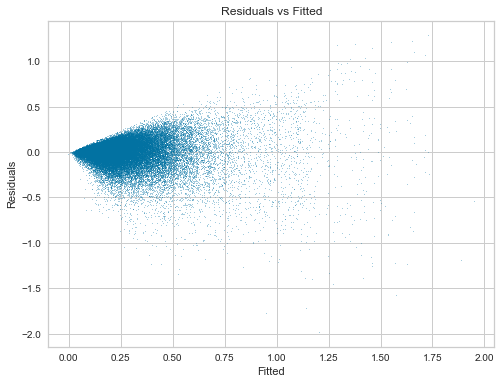

In [18]:
# residuals vs fitted plot
plt.figure(figsize = (8,6))
plt.scatter((y_pred_test), (y_pred_test - y_test), s = 0.1)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

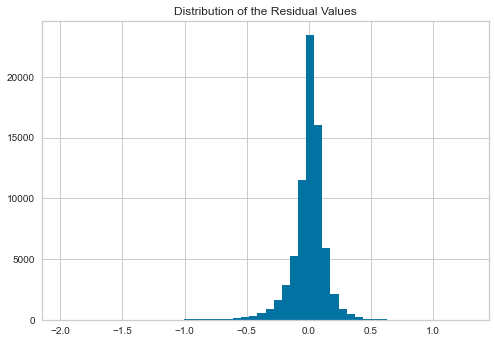

In [19]:
# distribution of the residuals plot
plt.figure()
plt.hist((y_pred_test - y_test), bins = 50)
plt.title("Distribution of the Residual Values")
plt.show()

Based on the charts above, even though the residuals seem normally distributed, they present a specific type of pattern, indicating Heteroscedasticity. That means we cannot assume the variance of the residuals is the same for any value of **X**.

#### Machine Learning Model Visualization
<a id = 'model_viz'></a>

Data Visualization plays an essential role in Data Science, helping explain more about the data, identifying patterns, and so on. 

Machine Learning models are not always easy to understand or explain. Most of the time, the transformations and analyses happen in the background, and they are not always so intuitive or straightforward. However, as Data Scientists, we have essential tools to help us achieve the most suitable model, finding the best hyperparameters and using all kinds of charts and tables to explain its results.

In this Notebook section, I will use Shap (SHapley Additive exPlanations) to make the model results more understandable.

In [20]:
# import Shap
import shap

In [21]:
# use shap to explain the results 
# fit the model to Shap
explainer_shap = shap.TreeExplainer(model_final)

# Shap values
shap_values = explainer_shap.shap_values(X_train_mm)

In [22]:
# initiate javascript for visualization
shap.initjs()

The chart below show the summary of the model. The x-axis stands for the Shap value, and the y-axis has the top 5 features impacting in the model.

As expected, we can identify that distance has the highest impact in our model; however, surprisingly, we identify that Spirit Airlines (RPCarrier_NK) also made to the top 5, significantly impacting the the ***FarePerMile*** of the industry.

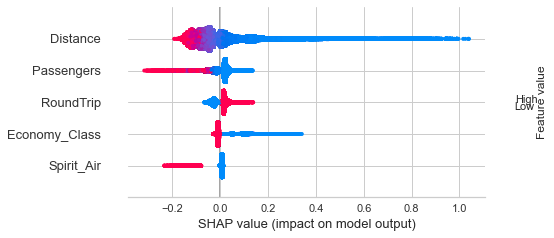

In [23]:
# global interpretation - summary plot (bar)
shap.summary_plot(shap_values,
                  max_display = 5,
                  features = X_train,
                  feature_names = X_train.columns)

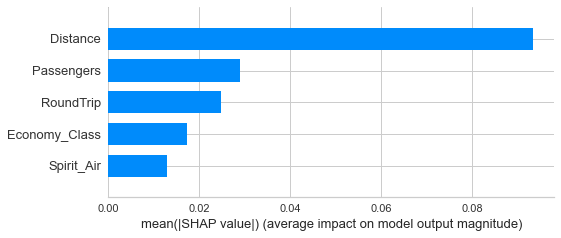

In [24]:
# global interpretation - summary plot (bar)
shap.summary_plot(shap_values,
                  max_display = 5,
                  features = X_train_mm,
                  feature_names = X_train.columns,
                  plot_type = 'bar')


I will also perform some analysis, comparing information across the dataset.

The first one regards the difference of ***FarePerMile*** over the year, and the second one considers the difference in price related to different routes.

**Comparison 1:**
- Analysing the same route, the same airline, and the same year, I will check the impact of seasonality on prices.

**Comparison 2:** 
- Analysing the same airline, the same period of the year, the same year, I will check the impact of competitors on prices.

In [26]:
# comparison 1: same route, same carrier, same year, 2 different quarters
comparison_quarter1 = X_train[(X_train['JFK-LAX'] == 1) # New-York Los-Angeles
                            & (X_train['Economy_Class'] == 1) # Economy class
                            & (X_train['American_Airlines'] == 1) # American Airlines
                            & (X_train['RoundTrip'] == 0) # one way ticket
                            & (X_train['_Year'] == 2018) 
                            & (X_train['Passengers'] == 1.0)  
                            & (X_train['_Quarter'] == 1)]
comparison_quarter1.head(10)


,_Year,_Quarter,RoundTrip,Passengers,Distance,Economy_Class,First_Class,Business_Class,Endeavor_Air,American_Airlines,Alaska_Airlines,JetBlue,Alis_Cargo,Delta,ExpressJet,Frontier,Allegiant,GoJet,Hawaiian,Envoy_Air,Spirit_Air,PSA,SkyWest,Horizon,Sun_Country,United_Airlines,Virgin_America,SouthWest,Mesa_Airlines,Republic,ATL-BOS,ATL-BWI,ATL-DCA,ATL-DEN,ATL-DFW,ATL-DTW,ATL-EWR,ATL-FLL,ATL-HOU,ATL-IAH,ATL-LAS,ATL-LAX,ATL-LGA,ATL-MCO,ATL-MDW,ATL-MIA,ATL-MSP,ATL-MSY,ATL-ORD,ATL-PHL,ATL-PHX,ATL-SEA,ATL-SFO,ATL-TPA,AUS-ATL,AUS-BOS,AUS-DEN,AUS-EWR,AUS-JFK,AUS-LAS,AUS-LAX,AUS-MCO,AUS-ORD,AUS-SEA,AUS-SFO,BDL-FLL,BDL-MCO,BDL-TPA,BNA-BOS,BNA-LAX,BNA-LGA,BOI-SEA,BOS-ATL,BOS-AUS,BOS-BNA,BOS-CLT,BOS-DCA,BOS-DEN,BOS-DFW,BOS-DTW,BOS-EWR,BOS-FLL,BOS-LAS,BOS-LAX,BOS-LGA,BOS-MCO,BOS-MIA,BOS-MSP,BOS-MSY,BOS-ORD,BOS-PBI,BOS-PHL,BOS-PHX,BOS-RDU,BOS-RSW,BOS-SAN,BOS-SEA,BOS-SFO,BOS-SLC,BOS-TPA,BUF-MCO,BWI-ATL,BWI-DEN,BWI-FLL,BWI-LAS,BWI-LAX,BWI-MCO,BWI-ORD,BWI-SAN,BWI-SFO,CLE-ATL,CLE-BOS,CLE-FLL,CLE-LAS,CLE-LAX,CLE-LGA,CLE-MCO,CLE-ORD,CLT-BOS,CLT-EWR,CLT-LGA,CLT-ORD,CMH-LAX,CMH-LGA,CMH-MCO,CVG-DEN,CVG-LAS,CVG-LGA,DAL-LAX,DCA-ATL,DCA-BOS,DCA-FLL,DCA-LAX,DCA-MCO,DCA-MIA,DCA-ORD,DCA-SFO,DEN-ATL,DEN-AUS,DEN-BNA,DEN-BOS,DEN-BWI,DEN-DCA,DEN-DFW,DEN-DTW,DEN-EWR,DEN-FLL,DEN-IAD,DEN-IAH,DEN-LAS,DEN-LAX,DEN-LGA,DEN-MCI,DEN-MCO,DEN-MSP,DEN-MSY,DEN-ORD,DEN-PDX,DEN-PHL,DEN-PHX,DEN-SAN,DEN-SEA,DEN-SFO,DEN-SJC,DEN-SLC,DEN-SNA,DEN-TPA,DFW-ATL,DFW-BOS,DFW-CLT,DFW-DCA,DFW-DEN,DFW-DTW,DFW-EWR,DFW-LAS,DFW-LAX,DFW-LGA,DFW-MCO,DFW-MSP,DFW-ORD,DFW-PHL,DFW-PHX,DFW-SEA,DFW-SFO,DTW-ATL,DTW-BOS,DTW-DEN,DTW-DFW,DTW-EWR,DTW-FLL,DTW-IAH,DTW-LAS,DTW-LAX,DTW-LGA,DTW-MCO,DTW-MIA,DTW-ORD,DTW-PHL,DTW-PHX,DTW-RSW,DTW-SFO,DTW-TPA,EWR-ATL,EWR-AUS,EWR-BNA,EWR-BOS,EWR-CLT,EWR-DEN,EWR-DFW,EWR-DTW,EWR-FLL,EWR-IAH,EWR-LAS,EWR-LAX,EWR-MCO,EWR-MIA,EWR-MSP,EWR-MSY,EWR-ORD,EWR-PBI,EWR-PHX,EWR-RDU,EWR-RSW,EWR-SAN,EWR-SEA,EWR-SFO,EWR-TPA,FLL-ATL,FLL-BOS,FLL-DEN,FLL-EWR,FLL-LAS,FLL-LAX,FLL-LGA,FLL-ORD,FLL-PHL,GEG-SEA,HNL-LAS,HNL-LAX,IAD-ATL,IAD-DEN,IAD-LAS,IAD-LAX,IAD-MCO,IAD-SEA,IAD-SFO,IAH-ATL,IAH-BOS,IAH-DCA,IAH-DEN,IAH-DTW,IAH-EWR,IAH-LAS,IAH-LAX,IAH-LGA,IAH-MCO,IAH-MIA,IAH-MSP,IAH-ORD,IAH-PHL,IAH-SEA,IAH-SFO,IND-LAS,IND-LAX,IND-MCO,JFK-ATL,JFK-AUS,JFK-BOS,JFK-CLT,JFK-DEN,JFK-FLL,JFK-LAS,JFK-LAX,JFK-MCO,JFK-MIA,JFK-MSY,JFK-ORD,JFK-PBI,JFK-PDX,JFK-PHX,JFK-SAN,JFK-SEA,JFK-SFO,JFK-SJU,JFK-SLC,JFK-TPA,LAS-DEN,LAS-EWR,LAS-JFK,LAS-LAX,LAS-MCO,LAS-ORD,LAS-SEA,LAS-SFO,LAX-ATL,LAX-AUS,LAX-BNA,LAX-BOS,LAX-BWI,LAX-CLE,LAX-DCA,LAX-DEN,LAX-DFW,LAX-DTW,LAX-EWR,LAX-FLL,LAX-HNL,LAX-IAD,LAX-IAH,LAX-JFK,LAX-KOA,LAX-LAS,LAX-LIH,LAX-MCI,LAX-MCO,LAX-MIA,LAX-MSP,LAX-MSY,LAX-OGG,LAX-ORD,LAX-PDX,LAX-PHL,LAX-PHX,LAX-RDU,LAX-SEA,LAX-SFO,LAX-SJC,LAX-SLC,LAX-SMF,LAX-TPA,LGA-ATL,LGA-BNA,LGA-BOS,LGA-CLE,LGA-CLT,LGA-CMH,LGA-DCA,LGA-DEN,LGA-DFW,LGA-DTW,LGA-FLL,LGA-IAH,LGA-MCO,LGA-MIA,LGA-MSP,LGA-MSY,LGA-ORD,LGA-PBI,LGA-PIT,LGA-RDU,LGA-STL,LGA-TPA,MCI-DEN,MCI-LAX,MCI-LGA,MCI-MCO,MCO-ATL,MCO-BOS,MCO-DCA,MCO-DEN,MCO-DTW,MCO-EWR,MCO-JFK,MCO-LAS,MCO-LAX,MCO-LGA,MCO-ORD,MCO-PHL,MCO-SEA,MCO-SFO,MCO-SJU,MIA-ATL,MIA-EWR,MIA-JFK,MIA-LAX,MIA-LGA,MIA-ORD,MIA-SFO,MSP-ATL,MSP-BNA,MSP-BOS,MSP-DCA,MSP-DEN,MSP-DFW,MSP-EWR,MSP-IAH,MSP-LAS,MSP-LAX,MSP-LGA,MSP-MCO,MSP-MIA,MSP-ORD,MSP-PHL,MSP-PHX,MSP-RSW,MSP-SAN,MSP-SEA,MSP-SFO,MSP-TPA,MSY-LAX,OAK-LAS,OAK-SEA,ORD-ATL,ORD-AUS,ORD-BNA,ORD-BOS,ORD-BWI,ORD-CLE,ORD-CLT,ORD-DCA,ORD-DEN,ORD-DFW,ORD-DTW,ORD-EWR,ORD-FLL,ORD-IAH,ORD-LAS,ORD-LAX,ORD-LGA,ORD-MCI,ORD-MCO,ORD-MIA,ORD-MSP,ORD-MSY,ORD-PDX,ORD-PHL,ORD-PHX,ORD-RDU,ORD-RSW,ORD-SAN,ORD-SEA,ORD-SFO,ORD-SLC,ORD-SNA,ORD-TPA,PDX-DEN,PDX-HNL,PDX-JFK,PDX-LAS,PDX-LAX,PDX-ORD,PDX-PHX,PDX-SAN,PDX-SEA,PDX-SFO,PDX-SJC,PHL-ATL,PHL-BNA,PHL-BOS,PHL-DEN,PHL-DFW,PHL-DTW,PHL-FLL,PHL-IAH,PHL-LAS,PHL-LAX,PHL-MCO,PHL-MIA,PHL-MSP,PHL-MSY,PHL-ORD,PHL-SFO,PHL-TPA,PHX-ATL,PHX-BOS,PHX-DEN,PHX-DFW,PHX-DTW,PHX-EWR,PHX-JFK,PHX-LAX,PHX-MCO,PHX-MSP,PHX-ORD,PHX-PDX,PHX-SEA,PHX-SFO,PHX-SLC,PIT-LAS,PIT-LGA,PIT-MCO,PIT-ORD,PVD-MCO,RDU-BOS,RDU-EWR,RDU-FLL,RDU-LAS,RDU-LAX,RDU-LGA,RDU-MCO

In [27]:
# plot Shap values
# JFK - LAX Route
# American Airlines
# One-way ticket
# Year: 2018
# Quarter: 1
# j = index to be used
j = 19442
shap.force_plot(explainer_shap.expected_value,
                shap_values[j],
                features = X_train.iloc[j],
                feature_names = X_train.columns)

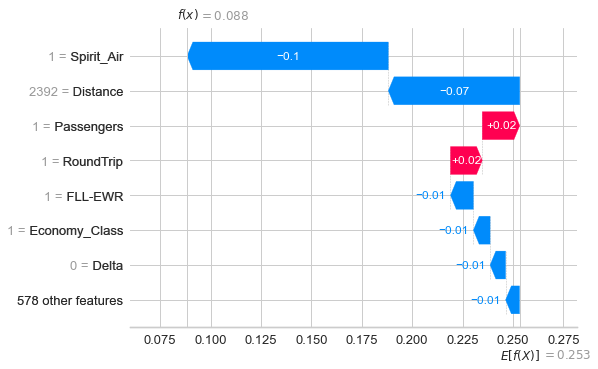

In [28]:
# plot Shap waterfall_plot
shap.waterfall_plot(shap.Explanation
                    (values = shap_values[j],
                     base_values = explainer_shap.expected_value,
                     data = X_train.iloc[j],
                     feature_names = X_train.columns.tolist()), 
                     max_display = 8)


The two charts above analyze the JFK-LAX route in the 2018 first quarter. For that specific slice of data, RP_Carrier_NK and the distance reduce the fare per mile prediction.

In [29]:
# comparison 1: same route, same carrier, same year, 2 different quarters
comparison_quarter4 = X_train[(X_train['JFK-LAX'] == 1) # New-York - Los Angeles
                            & (X_train['Economy_Class'] == 1) # Economy Class
                            & (X_train['American_Airlines'] == 1) # American Airlines
                            & (X_train['RoundTrip'] == 0) # one way ticket
                            & (X_train['_Year'] == 2018)
                            & (X_train['Passengers'] == 1.0)  
                            & (X_train['_Quarter'] == 4)]
comparison_quarter4.head(10)

,_Year,_Quarter,RoundTrip,Passengers,Distance,Economy_Class,First_Class,Business_Class,Endeavor_Air,American_Airlines,Alaska_Airlines,JetBlue,Alis_Cargo,Delta,ExpressJet,Frontier,Allegiant,GoJet,Hawaiian,Envoy_Air,Spirit_Air,PSA,SkyWest,Horizon,Sun_Country,United_Airlines,Virgin_America,SouthWest,Mesa_Airlines,Republic,ATL-BOS,ATL-BWI,ATL-DCA,ATL-DEN,ATL-DFW,ATL-DTW,ATL-EWR,ATL-FLL,ATL-HOU,ATL-IAH,ATL-LAS,ATL-LAX,ATL-LGA,ATL-MCO,ATL-MDW,ATL-MIA,ATL-MSP,ATL-MSY,ATL-ORD,ATL-PHL,ATL-PHX,ATL-SEA,ATL-SFO,ATL-TPA,AUS-ATL,AUS-BOS,AUS-DEN,AUS-EWR,AUS-JFK,AUS-LAS,AUS-LAX,AUS-MCO,AUS-ORD,AUS-SEA,AUS-SFO,BDL-FLL,BDL-MCO,BDL-TPA,BNA-BOS,BNA-LAX,BNA-LGA,BOI-SEA,BOS-ATL,BOS-AUS,BOS-BNA,BOS-CLT,BOS-DCA,BOS-DEN,BOS-DFW,BOS-DTW,BOS-EWR,BOS-FLL,BOS-LAS,BOS-LAX,BOS-LGA,BOS-MCO,BOS-MIA,BOS-MSP,BOS-MSY,BOS-ORD,BOS-PBI,BOS-PHL,BOS-PHX,BOS-RDU,BOS-RSW,BOS-SAN,BOS-SEA,BOS-SFO,BOS-SLC,BOS-TPA,BUF-MCO,BWI-ATL,BWI-DEN,BWI-FLL,BWI-LAS,BWI-LAX,BWI-MCO,BWI-ORD,BWI-SAN,BWI-SFO,CLE-ATL,CLE-BOS,CLE-FLL,CLE-LAS,CLE-LAX,CLE-LGA,CLE-MCO,CLE-ORD,CLT-BOS,CLT-EWR,CLT-LGA,CLT-ORD,CMH-LAX,CMH-LGA,CMH-MCO,CVG-DEN,CVG-LAS,CVG-LGA,DAL-LAX,DCA-ATL,DCA-BOS,DCA-FLL,DCA-LAX,DCA-MCO,DCA-MIA,DCA-ORD,DCA-SFO,DEN-ATL,DEN-AUS,DEN-BNA,DEN-BOS,DEN-BWI,DEN-DCA,DEN-DFW,DEN-DTW,DEN-EWR,DEN-FLL,DEN-IAD,DEN-IAH,DEN-LAS,DEN-LAX,DEN-LGA,DEN-MCI,DEN-MCO,DEN-MSP,DEN-MSY,DEN-ORD,DEN-PDX,DEN-PHL,DEN-PHX,DEN-SAN,DEN-SEA,DEN-SFO,DEN-SJC,DEN-SLC,DEN-SNA,DEN-TPA,DFW-ATL,DFW-BOS,DFW-CLT,DFW-DCA,DFW-DEN,DFW-DTW,DFW-EWR,DFW-LAS,DFW-LAX,DFW-LGA,DFW-MCO,DFW-MSP,DFW-ORD,DFW-PHL,DFW-PHX,DFW-SEA,DFW-SFO,DTW-ATL,DTW-BOS,DTW-DEN,DTW-DFW,DTW-EWR,DTW-FLL,DTW-IAH,DTW-LAS,DTW-LAX,DTW-LGA,DTW-MCO,DTW-MIA,DTW-ORD,DTW-PHL,DTW-PHX,DTW-RSW,DTW-SFO,DTW-TPA,EWR-ATL,EWR-AUS,EWR-BNA,EWR-BOS,EWR-CLT,EWR-DEN,EWR-DFW,EWR-DTW,EWR-FLL,EWR-IAH,EWR-LAS,EWR-LAX,EWR-MCO,EWR-MIA,EWR-MSP,EWR-MSY,EWR-ORD,EWR-PBI,EWR-PHX,EWR-RDU,EWR-RSW,EWR-SAN,EWR-SEA,EWR-SFO,EWR-TPA,FLL-ATL,FLL-BOS,FLL-DEN,FLL-EWR,FLL-LAS,FLL-LAX,FLL-LGA,FLL-ORD,FLL-PHL,GEG-SEA,HNL-LAS,HNL-LAX,IAD-ATL,IAD-DEN,IAD-LAS,IAD-LAX,IAD-MCO,IAD-SEA,IAD-SFO,IAH-ATL,IAH-BOS,IAH-DCA,IAH-DEN,IAH-DTW,IAH-EWR,IAH-LAS,IAH-LAX,IAH-LGA,IAH-MCO,IAH-MIA,IAH-MSP,IAH-ORD,IAH-PHL,IAH-SEA,IAH-SFO,IND-LAS,IND-LAX,IND-MCO,JFK-ATL,JFK-AUS,JFK-BOS,JFK-CLT,JFK-DEN,JFK-FLL,JFK-LAS,JFK-LAX,JFK-MCO,JFK-MIA,JFK-MSY,JFK-ORD,JFK-PBI,JFK-PDX,JFK-PHX,JFK-SAN,JFK-SEA,JFK-SFO,JFK-SJU,JFK-SLC,JFK-TPA,LAS-DEN,LAS-EWR,LAS-JFK,LAS-LAX,LAS-MCO,LAS-ORD,LAS-SEA,LAS-SFO,LAX-ATL,LAX-AUS,LAX-BNA,LAX-BOS,LAX-BWI,LAX-CLE,LAX-DCA,LAX-DEN,LAX-DFW,LAX-DTW,LAX-EWR,LAX-FLL,LAX-HNL,LAX-IAD,LAX-IAH,LAX-JFK,LAX-KOA,LAX-LAS,LAX-LIH,LAX-MCI,LAX-MCO,LAX-MIA,LAX-MSP,LAX-MSY,LAX-OGG,LAX-ORD,LAX-PDX,LAX-PHL,LAX-PHX,LAX-RDU,LAX-SEA,LAX-SFO,LAX-SJC,LAX-SLC,LAX-SMF,LAX-TPA,LGA-ATL,LGA-BNA,LGA-BOS,LGA-CLE,LGA-CLT,LGA-CMH,LGA-DCA,LGA-DEN,LGA-DFW,LGA-DTW,LGA-FLL,LGA-IAH,LGA-MCO,LGA-MIA,LGA-MSP,LGA-MSY,LGA-ORD,LGA-PBI,LGA-PIT,LGA-RDU,LGA-STL,LGA-TPA,MCI-DEN,MCI-LAX,MCI-LGA,MCI-MCO,MCO-ATL,MCO-BOS,MCO-DCA,MCO-DEN,MCO-DTW,MCO-EWR,MCO-JFK,MCO-LAS,MCO-LAX,MCO-LGA,MCO-ORD,MCO-PHL,MCO-SEA,MCO-SFO,MCO-SJU,MIA-ATL,MIA-EWR,MIA-JFK,MIA-LAX,MIA-LGA,MIA-ORD,MIA-SFO,MSP-ATL,MSP-BNA,MSP-BOS,MSP-DCA,MSP-DEN,MSP-DFW,MSP-EWR,MSP-IAH,MSP-LAS,MSP-LAX,MSP-LGA,MSP-MCO,MSP-MIA,MSP-ORD,MSP-PHL,MSP-PHX,MSP-RSW,MSP-SAN,MSP-SEA,MSP-SFO,MSP-TPA,MSY-LAX,OAK-LAS,OAK-SEA,ORD-ATL,ORD-AUS,ORD-BNA,ORD-BOS,ORD-BWI,ORD-CLE,ORD-CLT,ORD-DCA,ORD-DEN,ORD-DFW,ORD-DTW,ORD-EWR,ORD-FLL,ORD-IAH,ORD-LAS,ORD-LAX,ORD-LGA,ORD-MCI,ORD-MCO,ORD-MIA,ORD-MSP,ORD-MSY,ORD-PDX,ORD-PHL,ORD-PHX,ORD-RDU,ORD-RSW,ORD-SAN,ORD-SEA,ORD-SFO,ORD-SLC,ORD-SNA,ORD-TPA,PDX-DEN,PDX-HNL,PDX-JFK,PDX-LAS,PDX-LAX,PDX-ORD,PDX-PHX,PDX-SAN,PDX-SEA,PDX-SFO,PDX-SJC,PHL-ATL,PHL-BNA,PHL-BOS,PHL-DEN,PHL-DFW,PHL-DTW,PHL-FLL,PHL-IAH,PHL-LAS,PHL-LAX,PHL-MCO,PHL-MIA,PHL-MSP,PHL-MSY,PHL-ORD,PHL-SFO,PHL-TPA,PHX-ATL,PHX-BOS,PHX-DEN,PHX-DFW,PHX-DTW,PHX-EWR,PHX-JFK,PHX-LAX,PHX-MCO,PHX-MSP,PHX-ORD,PHX-PDX,PHX-SEA,PHX-SFO,PHX-SLC,PIT-LAS,PIT-LGA,PIT-MCO,PIT-ORD,PVD-MCO,RDU-BOS,RDU-EWR,RDU-FLL,RDU-LAS,RDU-LAX,RDU-LGA,RDU-MCO

In [30]:
# plot Shap values
# JFK - LAX Route
# American Airlines
# One-way ticket
# Year: 2018
# Quarter: 4
# j = index to be used
j = 213698
shap.force_plot(explainer_shap.expected_value,
                shap_values[j],
                features = X_train.iloc[j],
                feature_names = X_train.columns)

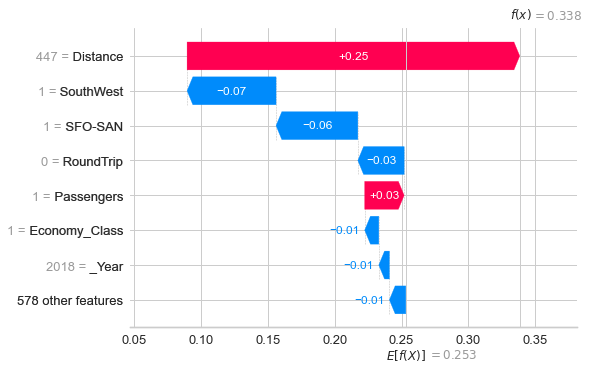

In [31]:
# plot Shap waterfall_plot
shap.waterfall_plot(shap.Explanation
                    (values = shap_values[j],                
                     base_values = explainer_shap.expected_value,
                     data = X_train.iloc[j],
                     feature_names = X_train.columns.tolist()),
                     max_display = 8)


The two charts above analyze the JFK-LAX route in the 2018 first quarter. For that specific slice of data, RP_Carrier_WN reduces the prediction, while the distance increases the fare per mile prediction.

In [32]:
# comparison 2: same carrier, same year, same quarter, different routes
comparison_compt1 = X_train[(X_train['JFK-LAX'] == 1) # New-York - Los-Angeles
                            & (X_train['Economy_Class'] == 1) # Economy Class
                            & (X_train['American_Airlines'] == 1) # American Airlines
                            & (X_train['RoundTrip'] == 0) # one-way ticket
                            & (X_train['_Year'] == 2018)
                            & (X_train['Passengers'] == 1.0)  
                            & (X_train['_Quarter'] == 4)]
comparison_compt1.head(10)

,_Year,_Quarter,RoundTrip,Passengers,Distance,Economy_Class,First_Class,Business_Class,Endeavor_Air,American_Airlines,Alaska_Airlines,JetBlue,Alis_Cargo,Delta,ExpressJet,Frontier,Allegiant,GoJet,Hawaiian,Envoy_Air,Spirit_Air,PSA,SkyWest,Horizon,Sun_Country,United_Airlines,Virgin_America,SouthWest,Mesa_Airlines,Republic,ATL-BOS,ATL-BWI,ATL-DCA,ATL-DEN,ATL-DFW,ATL-DTW,ATL-EWR,ATL-FLL,ATL-HOU,ATL-IAH,ATL-LAS,ATL-LAX,ATL-LGA,ATL-MCO,ATL-MDW,ATL-MIA,ATL-MSP,ATL-MSY,ATL-ORD,ATL-PHL,ATL-PHX,ATL-SEA,ATL-SFO,ATL-TPA,AUS-ATL,AUS-BOS,AUS-DEN,AUS-EWR,AUS-JFK,AUS-LAS,AUS-LAX,AUS-MCO,AUS-ORD,AUS-SEA,AUS-SFO,BDL-FLL,BDL-MCO,BDL-TPA,BNA-BOS,BNA-LAX,BNA-LGA,BOI-SEA,BOS-ATL,BOS-AUS,BOS-BNA,BOS-CLT,BOS-DCA,BOS-DEN,BOS-DFW,BOS-DTW,BOS-EWR,BOS-FLL,BOS-LAS,BOS-LAX,BOS-LGA,BOS-MCO,BOS-MIA,BOS-MSP,BOS-MSY,BOS-ORD,BOS-PBI,BOS-PHL,BOS-PHX,BOS-RDU,BOS-RSW,BOS-SAN,BOS-SEA,BOS-SFO,BOS-SLC,BOS-TPA,BUF-MCO,BWI-ATL,BWI-DEN,BWI-FLL,BWI-LAS,BWI-LAX,BWI-MCO,BWI-ORD,BWI-SAN,BWI-SFO,CLE-ATL,CLE-BOS,CLE-FLL,CLE-LAS,CLE-LAX,CLE-LGA,CLE-MCO,CLE-ORD,CLT-BOS,CLT-EWR,CLT-LGA,CLT-ORD,CMH-LAX,CMH-LGA,CMH-MCO,CVG-DEN,CVG-LAS,CVG-LGA,DAL-LAX,DCA-ATL,DCA-BOS,DCA-FLL,DCA-LAX,DCA-MCO,DCA-MIA,DCA-ORD,DCA-SFO,DEN-ATL,DEN-AUS,DEN-BNA,DEN-BOS,DEN-BWI,DEN-DCA,DEN-DFW,DEN-DTW,DEN-EWR,DEN-FLL,DEN-IAD,DEN-IAH,DEN-LAS,DEN-LAX,DEN-LGA,DEN-MCI,DEN-MCO,DEN-MSP,DEN-MSY,DEN-ORD,DEN-PDX,DEN-PHL,DEN-PHX,DEN-SAN,DEN-SEA,DEN-SFO,DEN-SJC,DEN-SLC,DEN-SNA,DEN-TPA,DFW-ATL,DFW-BOS,DFW-CLT,DFW-DCA,DFW-DEN,DFW-DTW,DFW-EWR,DFW-LAS,DFW-LAX,DFW-LGA,DFW-MCO,DFW-MSP,DFW-ORD,DFW-PHL,DFW-PHX,DFW-SEA,DFW-SFO,DTW-ATL,DTW-BOS,DTW-DEN,DTW-DFW,DTW-EWR,DTW-FLL,DTW-IAH,DTW-LAS,DTW-LAX,DTW-LGA,DTW-MCO,DTW-MIA,DTW-ORD,DTW-PHL,DTW-PHX,DTW-RSW,DTW-SFO,DTW-TPA,EWR-ATL,EWR-AUS,EWR-BNA,EWR-BOS,EWR-CLT,EWR-DEN,EWR-DFW,EWR-DTW,EWR-FLL,EWR-IAH,EWR-LAS,EWR-LAX,EWR-MCO,EWR-MIA,EWR-MSP,EWR-MSY,EWR-ORD,EWR-PBI,EWR-PHX,EWR-RDU,EWR-RSW,EWR-SAN,EWR-SEA,EWR-SFO,EWR-TPA,FLL-ATL,FLL-BOS,FLL-DEN,FLL-EWR,FLL-LAS,FLL-LAX,FLL-LGA,FLL-ORD,FLL-PHL,GEG-SEA,HNL-LAS,HNL-LAX,IAD-ATL,IAD-DEN,IAD-LAS,IAD-LAX,IAD-MCO,IAD-SEA,IAD-SFO,IAH-ATL,IAH-BOS,IAH-DCA,IAH-DEN,IAH-DTW,IAH-EWR,IAH-LAS,IAH-LAX,IAH-LGA,IAH-MCO,IAH-MIA,IAH-MSP,IAH-ORD,IAH-PHL,IAH-SEA,IAH-SFO,IND-LAS,IND-LAX,IND-MCO,JFK-ATL,JFK-AUS,JFK-BOS,JFK-CLT,JFK-DEN,JFK-FLL,JFK-LAS,JFK-LAX,JFK-MCO,JFK-MIA,JFK-MSY,JFK-ORD,JFK-PBI,JFK-PDX,JFK-PHX,JFK-SAN,JFK-SEA,JFK-SFO,JFK-SJU,JFK-SLC,JFK-TPA,LAS-DEN,LAS-EWR,LAS-JFK,LAS-LAX,LAS-MCO,LAS-ORD,LAS-SEA,LAS-SFO,LAX-ATL,LAX-AUS,LAX-BNA,LAX-BOS,LAX-BWI,LAX-CLE,LAX-DCA,LAX-DEN,LAX-DFW,LAX-DTW,LAX-EWR,LAX-FLL,LAX-HNL,LAX-IAD,LAX-IAH,LAX-JFK,LAX-KOA,LAX-LAS,LAX-LIH,LAX-MCI,LAX-MCO,LAX-MIA,LAX-MSP,LAX-MSY,LAX-OGG,LAX-ORD,LAX-PDX,LAX-PHL,LAX-PHX,LAX-RDU,LAX-SEA,LAX-SFO,LAX-SJC,LAX-SLC,LAX-SMF,LAX-TPA,LGA-ATL,LGA-BNA,LGA-BOS,LGA-CLE,LGA-CLT,LGA-CMH,LGA-DCA,LGA-DEN,LGA-DFW,LGA-DTW,LGA-FLL,LGA-IAH,LGA-MCO,LGA-MIA,LGA-MSP,LGA-MSY,LGA-ORD,LGA-PBI,LGA-PIT,LGA-RDU,LGA-STL,LGA-TPA,MCI-DEN,MCI-LAX,MCI-LGA,MCI-MCO,MCO-ATL,MCO-BOS,MCO-DCA,MCO-DEN,MCO-DTW,MCO-EWR,MCO-JFK,MCO-LAS,MCO-LAX,MCO-LGA,MCO-ORD,MCO-PHL,MCO-SEA,MCO-SFO,MCO-SJU,MIA-ATL,MIA-EWR,MIA-JFK,MIA-LAX,MIA-LGA,MIA-ORD,MIA-SFO,MSP-ATL,MSP-BNA,MSP-BOS,MSP-DCA,MSP-DEN,MSP-DFW,MSP-EWR,MSP-IAH,MSP-LAS,MSP-LAX,MSP-LGA,MSP-MCO,MSP-MIA,MSP-ORD,MSP-PHL,MSP-PHX,MSP-RSW,MSP-SAN,MSP-SEA,MSP-SFO,MSP-TPA,MSY-LAX,OAK-LAS,OAK-SEA,ORD-ATL,ORD-AUS,ORD-BNA,ORD-BOS,ORD-BWI,ORD-CLE,ORD-CLT,ORD-DCA,ORD-DEN,ORD-DFW,ORD-DTW,ORD-EWR,ORD-FLL,ORD-IAH,ORD-LAS,ORD-LAX,ORD-LGA,ORD-MCI,ORD-MCO,ORD-MIA,ORD-MSP,ORD-MSY,ORD-PDX,ORD-PHL,ORD-PHX,ORD-RDU,ORD-RSW,ORD-SAN,ORD-SEA,ORD-SFO,ORD-SLC,ORD-SNA,ORD-TPA,PDX-DEN,PDX-HNL,PDX-JFK,PDX-LAS,PDX-LAX,PDX-ORD,PDX-PHX,PDX-SAN,PDX-SEA,PDX-SFO,PDX-SJC,PHL-ATL,PHL-BNA,PHL-BOS,PHL-DEN,PHL-DFW,PHL-DTW,PHL-FLL,PHL-IAH,PHL-LAS,PHL-LAX,PHL-MCO,PHL-MIA,PHL-MSP,PHL-MSY,PHL-ORD,PHL-SFO,PHL-TPA,PHX-ATL,PHX-BOS,PHX-DEN,PHX-DFW,PHX-DTW,PHX-EWR,PHX-JFK,PHX-LAX,PHX-MCO,PHX-MSP,PHX-ORD,PHX-PDX,PHX-SEA,PHX-SFO,PHX-SLC,PIT-LAS,PIT-LGA,PIT-MCO,PIT-ORD,PVD-MCO,RDU-BOS,RDU-EWR,RDU-FLL,RDU-LAS,RDU-LAX,RDU-LGA,RDU-MCO

In [33]:
# plot Shap values
# JFK - LAX Route
# American Airlines
# Round trip: 0
# Year: 2018
# Quarter: 4
# j = index to be used
j = 341147
shap.force_plot(explainer_shap.expected_value,
                shap_values[j],
                features = X_train.iloc[j],
                feature_names = X_train.columns)

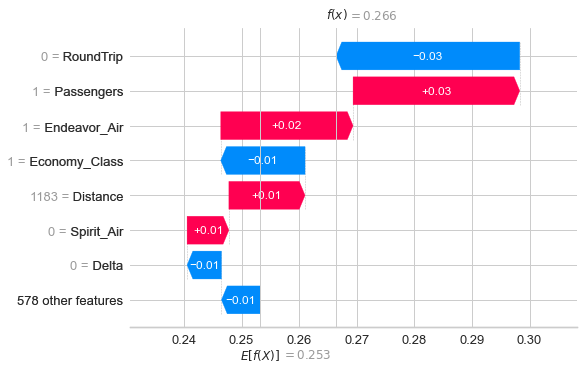

In [34]:
# plot Shap waterfall_plot
shap.waterfall_plot(shap.Explanation
                    (values = shap_values[j],
                     base_values = explainer_shap.expected_value,
                     data = X_train.iloc[j],
                     feature_names = X_train.columns.tolist()), 
                     max_display = 8)


The two charts above analyze the JFK-LAX route in the 2018 fourth quarter. RoundTrip and Passengers compete against each other for that specific slice of data, bringing the prediction to the same point.

In [35]:
# comparison 2: same carrier, same year, same quarter, different routes
comparison_compt2 = X_train[(X_train['DFW-PHL'] == 1) # Dallas - Philadelphia
                            & (X_train['Economy_Class'] == 1) # Economy Class
                            & (X_train['American_Airlines'] == 1) # American Airlines
                            & (X_train['RoundTrip'] == 0) # one-way ticket
                            & (X_train['_Year'] == 2018)
                            & (X_train['Passengers'] == 1.0)  
                            & (X_train['_Quarter'] == 4)]
comparison_compt2.head(10)

,_Year,_Quarter,RoundTrip,Passengers,Distance,Economy_Class,First_Class,Business_Class,Endeavor_Air,American_Airlines,Alaska_Airlines,JetBlue,Alis_Cargo,Delta,ExpressJet,Frontier,Allegiant,GoJet,Hawaiian,Envoy_Air,Spirit_Air,PSA,SkyWest,Horizon,Sun_Country,United_Airlines,Virgin_America,SouthWest,Mesa_Airlines,Republic,ATL-BOS,ATL-BWI,ATL-DCA,ATL-DEN,ATL-DFW,ATL-DTW,ATL-EWR,ATL-FLL,ATL-HOU,ATL-IAH,ATL-LAS,ATL-LAX,ATL-LGA,ATL-MCO,ATL-MDW,ATL-MIA,ATL-MSP,ATL-MSY,ATL-ORD,ATL-PHL,ATL-PHX,ATL-SEA,ATL-SFO,ATL-TPA,AUS-ATL,AUS-BOS,AUS-DEN,AUS-EWR,AUS-JFK,AUS-LAS,AUS-LAX,AUS-MCO,AUS-ORD,AUS-SEA,AUS-SFO,BDL-FLL,BDL-MCO,BDL-TPA,BNA-BOS,BNA-LAX,BNA-LGA,BOI-SEA,BOS-ATL,BOS-AUS,BOS-BNA,BOS-CLT,BOS-DCA,BOS-DEN,BOS-DFW,BOS-DTW,BOS-EWR,BOS-FLL,BOS-LAS,BOS-LAX,BOS-LGA,BOS-MCO,BOS-MIA,BOS-MSP,BOS-MSY,BOS-ORD,BOS-PBI,BOS-PHL,BOS-PHX,BOS-RDU,BOS-RSW,BOS-SAN,BOS-SEA,BOS-SFO,BOS-SLC,BOS-TPA,BUF-MCO,BWI-ATL,BWI-DEN,BWI-FLL,BWI-LAS,BWI-LAX,BWI-MCO,BWI-ORD,BWI-SAN,BWI-SFO,CLE-ATL,CLE-BOS,CLE-FLL,CLE-LAS,CLE-LAX,CLE-LGA,CLE-MCO,CLE-ORD,CLT-BOS,CLT-EWR,CLT-LGA,CLT-ORD,CMH-LAX,CMH-LGA,CMH-MCO,CVG-DEN,CVG-LAS,CVG-LGA,DAL-LAX,DCA-ATL,DCA-BOS,DCA-FLL,DCA-LAX,DCA-MCO,DCA-MIA,DCA-ORD,DCA-SFO,DEN-ATL,DEN-AUS,DEN-BNA,DEN-BOS,DEN-BWI,DEN-DCA,DEN-DFW,DEN-DTW,DEN-EWR,DEN-FLL,DEN-IAD,DEN-IAH,DEN-LAS,DEN-LAX,DEN-LGA,DEN-MCI,DEN-MCO,DEN-MSP,DEN-MSY,DEN-ORD,DEN-PDX,DEN-PHL,DEN-PHX,DEN-SAN,DEN-SEA,DEN-SFO,DEN-SJC,DEN-SLC,DEN-SNA,DEN-TPA,DFW-ATL,DFW-BOS,DFW-CLT,DFW-DCA,DFW-DEN,DFW-DTW,DFW-EWR,DFW-LAS,DFW-LAX,DFW-LGA,DFW-MCO,DFW-MSP,DFW-ORD,DFW-PHL,DFW-PHX,DFW-SEA,DFW-SFO,DTW-ATL,DTW-BOS,DTW-DEN,DTW-DFW,DTW-EWR,DTW-FLL,DTW-IAH,DTW-LAS,DTW-LAX,DTW-LGA,DTW-MCO,DTW-MIA,DTW-ORD,DTW-PHL,DTW-PHX,DTW-RSW,DTW-SFO,DTW-TPA,EWR-ATL,EWR-AUS,EWR-BNA,EWR-BOS,EWR-CLT,EWR-DEN,EWR-DFW,EWR-DTW,EWR-FLL,EWR-IAH,EWR-LAS,EWR-LAX,EWR-MCO,EWR-MIA,EWR-MSP,EWR-MSY,EWR-ORD,EWR-PBI,EWR-PHX,EWR-RDU,EWR-RSW,EWR-SAN,EWR-SEA,EWR-SFO,EWR-TPA,FLL-ATL,FLL-BOS,FLL-DEN,FLL-EWR,FLL-LAS,FLL-LAX,FLL-LGA,FLL-ORD,FLL-PHL,GEG-SEA,HNL-LAS,HNL-LAX,IAD-ATL,IAD-DEN,IAD-LAS,IAD-LAX,IAD-MCO,IAD-SEA,IAD-SFO,IAH-ATL,IAH-BOS,IAH-DCA,IAH-DEN,IAH-DTW,IAH-EWR,IAH-LAS,IAH-LAX,IAH-LGA,IAH-MCO,IAH-MIA,IAH-MSP,IAH-ORD,IAH-PHL,IAH-SEA,IAH-SFO,IND-LAS,IND-LAX,IND-MCO,JFK-ATL,JFK-AUS,JFK-BOS,JFK-CLT,JFK-DEN,JFK-FLL,JFK-LAS,JFK-LAX,JFK-MCO,JFK-MIA,JFK-MSY,JFK-ORD,JFK-PBI,JFK-PDX,JFK-PHX,JFK-SAN,JFK-SEA,JFK-SFO,JFK-SJU,JFK-SLC,JFK-TPA,LAS-DEN,LAS-EWR,LAS-JFK,LAS-LAX,LAS-MCO,LAS-ORD,LAS-SEA,LAS-SFO,LAX-ATL,LAX-AUS,LAX-BNA,LAX-BOS,LAX-BWI,LAX-CLE,LAX-DCA,LAX-DEN,LAX-DFW,LAX-DTW,LAX-EWR,LAX-FLL,LAX-HNL,LAX-IAD,LAX-IAH,LAX-JFK,LAX-KOA,LAX-LAS,LAX-LIH,LAX-MCI,LAX-MCO,LAX-MIA,LAX-MSP,LAX-MSY,LAX-OGG,LAX-ORD,LAX-PDX,LAX-PHL,LAX-PHX,LAX-RDU,LAX-SEA,LAX-SFO,LAX-SJC,LAX-SLC,LAX-SMF,LAX-TPA,LGA-ATL,LGA-BNA,LGA-BOS,LGA-CLE,LGA-CLT,LGA-CMH,LGA-DCA,LGA-DEN,LGA-DFW,LGA-DTW,LGA-FLL,LGA-IAH,LGA-MCO,LGA-MIA,LGA-MSP,LGA-MSY,LGA-ORD,LGA-PBI,LGA-PIT,LGA-RDU,LGA-STL,LGA-TPA,MCI-DEN,MCI-LAX,MCI-LGA,MCI-MCO,MCO-ATL,MCO-BOS,MCO-DCA,MCO-DEN,MCO-DTW,MCO-EWR,MCO-JFK,MCO-LAS,MCO-LAX,MCO-LGA,MCO-ORD,MCO-PHL,MCO-SEA,MCO-SFO,MCO-SJU,MIA-ATL,MIA-EWR,MIA-JFK,MIA-LAX,MIA-LGA,MIA-ORD,MIA-SFO,MSP-ATL,MSP-BNA,MSP-BOS,MSP-DCA,MSP-DEN,MSP-DFW,MSP-EWR,MSP-IAH,MSP-LAS,MSP-LAX,MSP-LGA,MSP-MCO,MSP-MIA,MSP-ORD,MSP-PHL,MSP-PHX,MSP-RSW,MSP-SAN,MSP-SEA,MSP-SFO,MSP-TPA,MSY-LAX,OAK-LAS,OAK-SEA,ORD-ATL,ORD-AUS,ORD-BNA,ORD-BOS,ORD-BWI,ORD-CLE,ORD-CLT,ORD-DCA,ORD-DEN,ORD-DFW,ORD-DTW,ORD-EWR,ORD-FLL,ORD-IAH,ORD-LAS,ORD-LAX,ORD-LGA,ORD-MCI,ORD-MCO,ORD-MIA,ORD-MSP,ORD-MSY,ORD-PDX,ORD-PHL,ORD-PHX,ORD-RDU,ORD-RSW,ORD-SAN,ORD-SEA,ORD-SFO,ORD-SLC,ORD-SNA,ORD-TPA,PDX-DEN,PDX-HNL,PDX-JFK,PDX-LAS,PDX-LAX,PDX-ORD,PDX-PHX,PDX-SAN,PDX-SEA,PDX-SFO,PDX-SJC,PHL-ATL,PHL-BNA,PHL-BOS,PHL-DEN,PHL-DFW,PHL-DTW,PHL-FLL,PHL-IAH,PHL-LAS,PHL-LAX,PHL-MCO,PHL-MIA,PHL-MSP,PHL-MSY,PHL-ORD,PHL-SFO,PHL-TPA,PHX-ATL,PHX-BOS,PHX-DEN,PHX-DFW,PHX-DTW,PHX-EWR,PHX-JFK,PHX-LAX,PHX-MCO,PHX-MSP,PHX-ORD,PHX-PDX,PHX-SEA,PHX-SFO,PHX-SLC,PIT-LAS,PIT-LGA,PIT-MCO,PIT-ORD,PVD-MCO,RDU-BOS,RDU-EWR,RDU-FLL,RDU-LAS,RDU-LAX,RDU-LGA,RDU-MCO

In [36]:
# plot Shap values
# DFW - PHL Route
# American Airlines
# Round trip: 0
# Year: 2018
# Quarter: 4
# j = index to be used
j = 208072
shap.force_plot(explainer_shap.expected_value,
                shap_values[j],
                features = X_train.iloc[j],
                feature_names = X_train.columns)

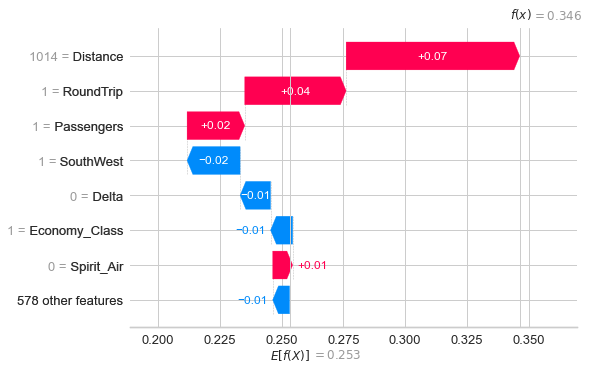

In [37]:
# plot Shap waterfall_plot
shap.waterfall_plot(shap.Explanation
                    (values = shap_values[j],
                     base_values = explainer_shap.expected_value,
                     data = X_train.iloc[j],
                     feature_names = X_train.columns.tolist()), 
                     max_display = 8)


The two charts above analyze the DFW-PHL route in the 2018 fourth quarter. Again, RoundTrip and distance have an essential role in increasing the prediction.

As we see above, the target variable ***FarePerMile*** does not behave the same when comparing specific observations.

Although the distance from the Origin and the Destination substantially affects the model overall, when assessing the results locally, that is not always true. 

Depending on the route, competition, and time of the year, that may change.

---

### Conclusion
<a id = 'conclusion'></a>

According to the IBM website, "Machine Learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy." 

Machine Learning is a type of artificial intelligence that allows software applications to study and train data, becoming more accurate at predicting outcomes. 

In this project, my goal was to assess air ticket data from 2018 and 2019 and, using the XGBoost model, develop some insights that would explain how the price of the tickets behave. In addition, I would also like to know if there is any correlation between ticket prices and routes or the number of players in a specific market (in other words, competitors).

Even though the features of this model did not explain as much of the target variable ***FarePerMile*** as expected, it was informative to understand some of the relationships between the target and the features in different markets.

---

### Reference
<a id = 'reference'></a>

[What is Machine Learning](https://www.ibm.com/cloud/learn/machine-learning)

[A Journey through XGBoost: Milestone 3](https://medium.com/towards-data-science/a-journey-through-xgboost-milestone-3-a5569c72d72b)

[Machine Learning Visualization](https://towardsdatascience.com/machine-learning-visualization-fcc39a1e376a)

[Explain Your Model with the SHAP Values](https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d)

[Using SHAP Values to Explain How Your Machine Learning Model Works](https://medium.com/towards-data-science/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)